In [22]:
import numpy as np 
from PIL import Image ,ImageOps
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os

In [15]:
def CalculateIntegral(image):
    height = image.shape[0]
    width = image.shape[1]
    integral = np.array([ np.array([0 for i in range(width)]) for j in range(height)])
    for i in range(height):
        for j in range(width):
            x1=0
            x2=0
            x3 =0
            if(i-1>=0):
                x1 = integral[i-1][j]
            if(j-1>=0):
                x2=integral[i][j-1]
            if(j-1>=0 and i-1>=0):
                x3=integral[i-1][j-1]
            integral[i][j] = image[i][j] + x1 + x2 - x3
    return integral
            

In [127]:
def CalculateLocalSum(integral,p0,p1):
    x0=p0[1]
    y0=p0[0]
    x1=p1[1]
    y1=p1[0]
    left =0 
    if(x1>= integral.shape[0] or y1>=integral.shape[1] or y1<0 or x1<0 or x0<0 or y0<0):
        return 0
    if(y0>0):
        left = integral[x1][y0-1] 
    up =0
    if(x0>0):
        up = integral[x0-1][y1]
    corner=0
    if(up>0 and left>0 ):
        corner = integral[x0-1][y0-1]
    integ = integral[x1][y1]
    localsum = integ + corner -  left -  up 
    return localsum

In [140]:
def DetectEye(integral,kernelwidth):
    kernelheight = kernelwidth*0.15
    i =0
    j =0
    maxsum = integral[0][0]
    maxpair = (0,0)
#     while(i + 2*kernelheight< integral.shape[0]):
#         p1 = (j+int(-0.5*kernelwidth),i+int(-0.5*kernelheight))
#         p2 = (j+int(-0.05*kernelwidth),i)
#         p3 = (j+int(-0.5*kernelwidth),i)
#         p4 = (j+int(-0.05*kernelwidth),i+int(0.5*kernelheight))
#         p5 = (j+int(0.05*kernelwidth),i+int(-0.5*kernelheight))
#         p6 = (j+int(0.5*kernelwidth),i) 
#         p7 = (j+int(0.05*kernelwidth),i) 
#         p8 = (j+int(0.5*kernelwidth),i+int(0.5*kernelheight)) 
#         p9 = (j+int(-0.325*kernelwidth),i+int(0.833*kernelheight)) 
#         p10 = (j+int(-0.225*kernelwidth),i+int(2*kernelheight))
#         p11 = (j+int(-0.1*kernelwidth),i+int(0.833*kernelheight))
#         p12 = (j+int(0.1*kernelwidth),i+int(2*kernelheight))
#         p13 = (j+int(0.225*kernelwidth),i+int(0.833*kernelheight))
#         p14 = (j+int(0.325*kernelwidth),i+int(2*kernelheight))
#         localsum1 = CalculateLocalSum(integral,p1,p2)
#         localsum2= CalculateLocalSum(integral,p3,p4)
#         localsum3= CalculateLocalSum(integral,p5,p6)
#         localsum4= CalculateLocalSum(integral,p7,p8)
#         localsum5= CalculateLocalSum(integral,p9,p10)
#         localsum6= CalculateLocalSum(integral,p11,p12)
#         localsum7= CalculateLocalSum(integral,p13,p14)
#         oursum = localsum1-localsum2+localsum3-localsum4-localsum5+localsum6-localsum7
#         if(oursum >maxsum):
#             maxpair=(i,j)
#         j += 1
    for i in range (int(integral.shape[0]-2*kernelheight)):
        for j in range(int(integral.shape[1]-0.5*kernelwidth)):
            p1 = (j+int(-0.5*kernelwidth),i+int(-0.5*kernelheight))
            p2 = (j+int(-0.05*kernelwidth),i)
            p3 = (j+int(-0.5*kernelwidth),i)
            p4 = (j+int(-0.05*kernelwidth),i+int(0.5*kernelheight))
            p5 = (j+int(0.05*kernelwidth),i+int(-0.5*kernelheight))
            p6 = (j+int(0.5*kernelwidth),i) 
            p7 = (j+int(0.05*kernelwidth),i) 
            p8 = (j+int(0.5*kernelwidth),i+int(0.5*kernelheight)) 
            p9 = (j+int(-0.325*kernelwidth),i+int(0.833*kernelheight)) 
            p10 = (j+int(-0.225*kernelwidth),i+int(2*kernelheight))
            p11 = (j+int(-0.1*kernelwidth),i+int(0.833*kernelheight))
            p12 = (j+int(0.1*kernelwidth),i+int(2*kernelheight))
            p13 = (j+int(0.225*kernelwidth),i+int(0.833*kernelheight))
            p14 = (j+int(0.325*kernelwidth),i+int(2*kernelheight))
            localsum1 = CalculateLocalSum(integral,p1,p2)
            localsum2= CalculateLocalSum(integral,p3,p4)
            localsum3= CalculateLocalSum(integral,p5,p6)
            localsum4= CalculateLocalSum(integral,p7,p8)
            localsum5= CalculateLocalSum(integral,p9,p10)
            localsum6= CalculateLocalSum(integral,p11,p12)
            localsum7= CalculateLocalSum(integral,p13,p14)
            oursum = localsum1-localsum2+localsum3-localsum4-localsum5+localsum6-localsum7
            if(localsum1==0 or localsum2==0 or localsum3==0 or localsum4==0 or localsum5 ==0 or localsum6==0 or localsum7==0):
                oursum=0
            if(oursum >maxsum):
                maxsum=oursum
                maxpair=(i,j)
                
#         if(j+0.5*kernelwidth>= integral.shape[1]):
#             j=0
#             i +=1
    return maxpair

In [141]:
def ExtractDetectedEye(img,maxpos,kernelwidth):
    kernelheight = kernelwidth*0.15
    image = np.asarray(img)
    integral = CalculateIntegral(image)
    p = DetectEye(integral,330)
    im = Image.new('L', (1000, 743))
    im2=im2= np.asarray(im)
    kernelh = int(kernelwidth*0.15)
    ip=maxpos[0]
    jp=maxpos[1]
    for i in range(ip-int(-0.5*kernelheight),ip+2*kernelh):
        for j in range(jp+int(-0.5*kernelwidth),jp+int(0.5*kernelwidth)):
            im.putpixel((j,i),int(image[i][j]))
            im2[i][j] = image[i][j]
    imgplot = plt.imshow(im,cmap='gray')
    plt.show()
    return im2

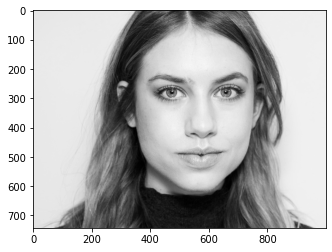

(220, 567)


In [ ]:
img = Image.open("input/f2.png")
img=img.convert("L")
imgplot = plt.imshow(img,cmap='gray')
plt.show()
image = np.asarray(img)
integral = CalculateIntegral(image)
p = DetectEye(integral,330)
print(p)
im2 = ExtractDetectedEye(img,p,330)
Image.fromarray(im2).save("output/f2.png")

img = Image.open("input/f3.jpg")
img=img.convert("L")
image = np.asarray(img)
integral = CalculateIntegral(image)
p = DetectEye(integral,250)
print(p)

im2 = ExtractDetectedEye(img,p,250)
Image.fromarray(im2).save("output/f3.jpg")

img = Image.open("input/f6.jpg")
img=img.convert("L")
image = np.asarray(img)
integral = CalculateIntegral(image)
p = DetectEye(integral,150)
print(p)

im2 = ExtractDetectedEye(img,p,150)
Image.fromarray(im2).save("output/f6.jpg")


In [111]:
x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(CalculateIntegral(x))

[[ 1  3  6 10]
 [ 6 14 24 36]
 [15 33 54 78]]


In [125]:
x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[1,2,3,5]])
y=CalculateIntegral(x)
p0=(1,2)
p1=(3,3)
z = CalculateLocalSum(y,p0,p1)

28 36 6 136


In [126]:
print(y)
print(z)


[[  1   3   6  10]
 [  6  14  24  36]
 [ 15  33  54  78]
 [ 28  60  96 136]
 [ 29  63 102 147]]
78
